In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
Y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences


========= Dataset summary ========= 

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 1599 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 497.5 KB

========= A few first samples ========= 

      fixed_acidity  volatile_acidity  citric_

/tmp/ipython-input-403067163.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


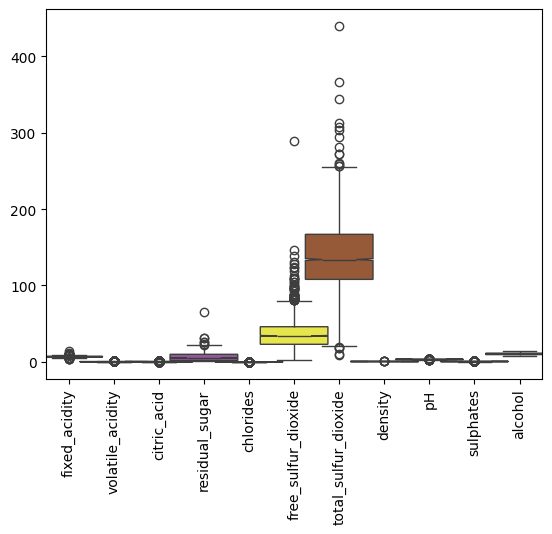

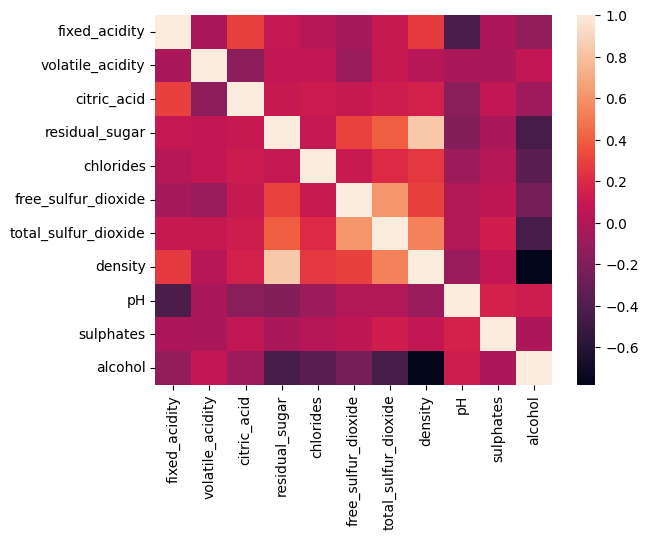

In [6]:
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

# The wine_quality object contains all data from the UCI repository.
# To access all columns, including 'color' which is categorized as 'Other',
# we should use wine_quality.data.original which holds the complete raw data.
df_original = wine_quality.data.original

# Filter for white wine and then drop the 'color' column as it's no longer needed in the features.
df = df_original[df_original['color'] == 'white'].drop('color', axis=1)

print("\n========= Dataset summary ========= \n")
df.info()
print("\n========= A few first samples ========= \n")
print(df.head())

X = df.drop("quality", axis=1) #we drop the column "quality"
Y = df["quality"]
print("\n========= Wine Qualities ========= \n")
print(Y.value_counts())

# bad wine (y=0) : quality <= 5 and good quality (y= 1) otherwise
Y = [0 if val <=5 else 1 for val in Y]

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
ax = plt.gca()
sns.boxplot(data=X,orient="v",palette="Set1",width=1.5, notch=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.figure()
corr = X.corr()
sns.heatmap(corr)

from sklearn.model_selection import train_test_split
Xa, Xt, Ya, Yt = train_test_split(X, Y, shuffle=True, test_size=1/3,
 stratify=Y)
Xa, Xv, Ya, Yv = train_test_split(Xa, Ya, shuffle=True, test_size=0.5,
 stratify=Ya)

from sklearn.neighbors import KNeighborsClassifier
# Fit the model on (Xa, Ya)
k = 3
clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(Xa, Ya)

# Predict the labels of samples in Xv
Ypred_v = clf.predict(Xv)
# evaluate classification error rate
from sklearn.metrics import accuracy_score
error_v = 1-accuracy_score(Yv, Ypred_v)

# some hints
k_vector = np.arange(1, 37, 2) #define a vector of k=1, 3, 5, ...
error_train = np.empty(k_vector.shape)
error_val = np.empty(k_vector.shape)
for ind, k in enumerate(k_vector):
#fit with k
 clf = KNeighborsClassifier(n_neighbors = k)
 clf.fit(Xa, Ya)
# predict and evaluate on training and validation sets
Ypred_train = clf.predict(Xa)
error_train[ind] = 1 - accuracy_score(Ya, Ypred_train)
Ypred_val = clf.predict(Xv)
error_val[ind] = 1 - accuracy_score(Yv, Ypred_val)

# some hints: get the min error and related k-value
err_min, ind_opt = error_val.min(), error_val.argmin()
k_star = k_vector[ind_opt]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(Xa)
Xa_n = sc.transform(Xa)
Xv_n = sc.transform(Xv)


### Correlation Matrix of Highly Interconnected Features

Let's visualize the correlation between features that show strong relationships with each other.

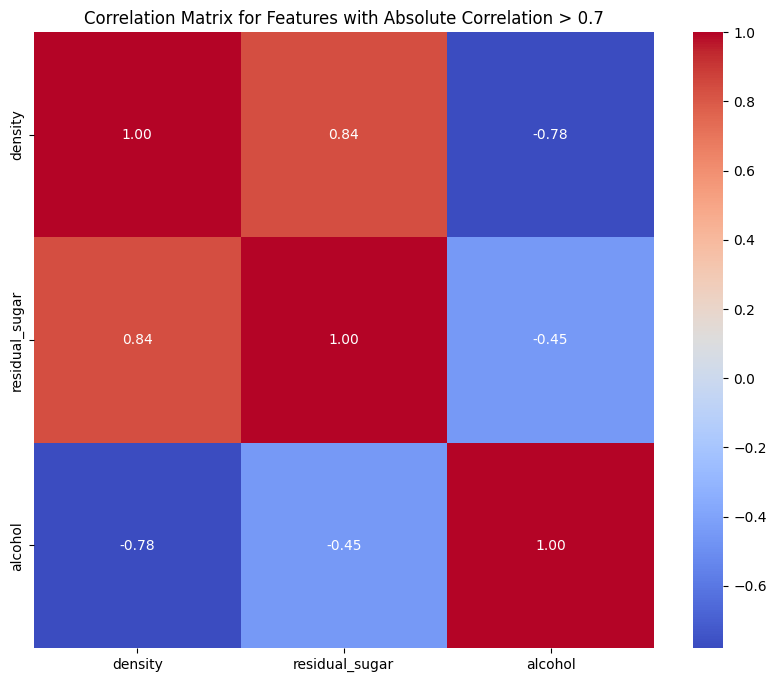

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get the correlation matrix of features (X already holds only features)
feature_correlation_matrix = X.corr()

# Set a correlation threshold to identify highly linked variables
correlation_threshold = 0.7

# Find highly correlated pairs (excluding self-correlation and quality if it were in X)
highly_correlated_features = set()
for i in range(len(feature_correlation_matrix.columns)):
    for j in range(i + 1, len(feature_correlation_matrix.columns)):
        if abs(feature_correlation_matrix.iloc[i, j]) > correlation_threshold:
            highly_correlated_features.add(feature_correlation_matrix.columns[i])
            highly_correlated_features.add(feature_correlation_matrix.columns[j])

# If no highly correlated features are found, handle it gracefully
if not highly_correlated_features:
    print(f"No feature pairs found with absolute correlation greater than {correlation_threshold}.")
else:
    # Create a sub-matrix for these highly correlated features
    sub_correlation_matrix = feature_correlation_matrix.loc[list(highly_correlated_features), list(highly_correlated_features)]

    # Plot the sub-correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(sub_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Features with Absolute Correlation > {correlation_threshold}')
    plt.show()


### Correlation Matrix including Quality

Let's visualize the correlation matrix between the wine quality and all the physicochemical features.

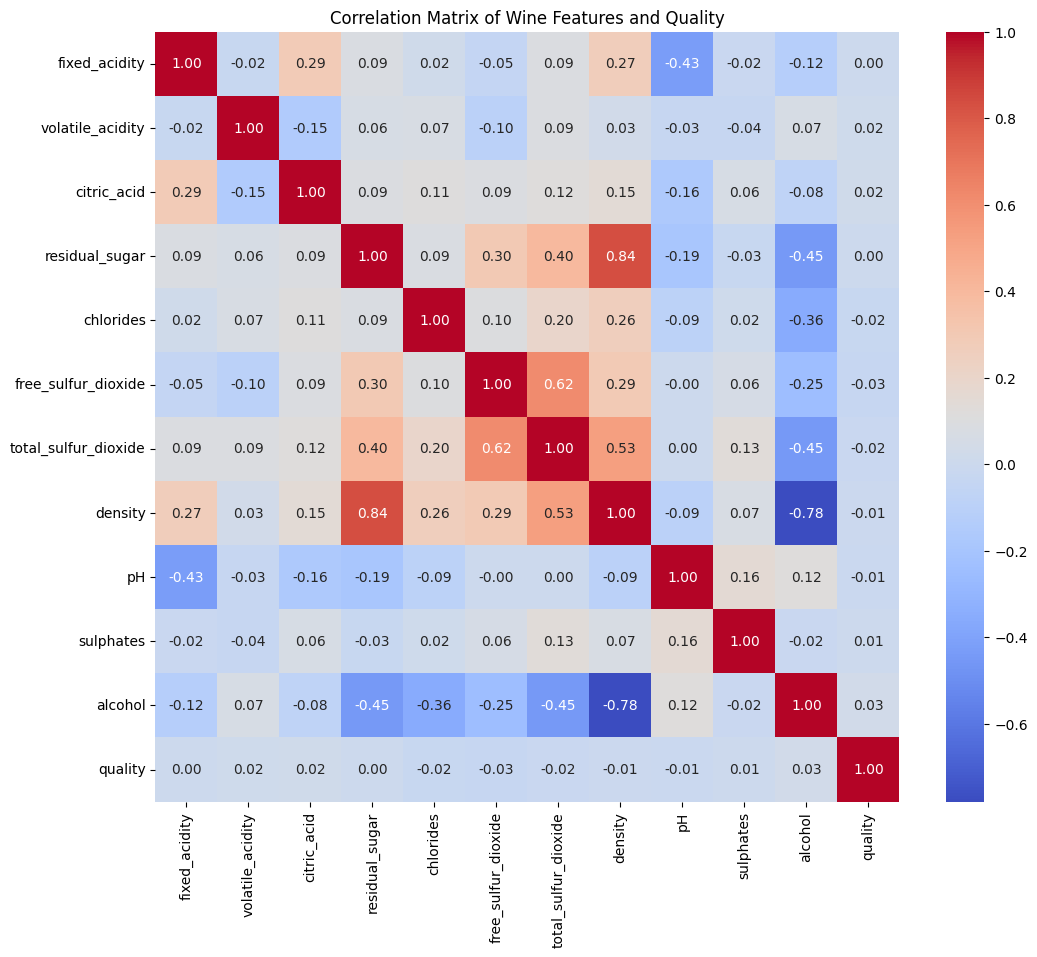

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Combine features (X) and target (Y) into a single DataFrame for correlation analysis
df_all_vars = pd.concat([X, pd.Series(Y, name='quality')], axis=1)

# Calculate the correlation matrix
correlation_matrix_all = df_all_vars.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features and Quality')
plt.show()
